In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score


### Reading Data

In [161]:
cars=pd.read_csv("cars-dataset.csv")
cars.shape

(398, 8)

In [162]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [163]:
cars.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [164]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [165]:
cars.columns.tolist()

['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']

In [166]:
# Checking for missing values
cars.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

### 1.	EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) 

In [167]:
features = ["cyl","disp","wt","acc","yr","mpg","hp"]
features

['cyl', 'disp', 'wt', 'acc', 'yr', 'mpg', 'hp']

In [168]:
cars.hp.value_counts()
print("We have", (cars.hp == "?").sum(), "?'s that need to be replaced!")

We have 6 ?'s that need to be replaced!


In [169]:
# We will replace ? with '0' so that we can convert the column to a integer using astype()
cars.hp.replace('?', '0', inplace=True)
cars.hp = cars.hp.astype(dtype=int)



In [170]:
cars.hp.value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
70     12
67     12
105    12
65     10
85      9
97      9
80      7
145     7
140     7
72      6
78      6
68      6
92      6
84      6
0       6
170     5
60      5
180     5
175     5
86      5
71      5
115     5
130     5
       ..
49      1
64      1
54      1
61      1
220     1
148     1
193     1
82      1
142     1
152     1
138     1
137     1
135     1
133     1
132     1
122     1
116     1
113     1
108     1
107     1
103     1
102     1
158     1
94      1
93      1
91      1
167     1
89      1
149     1
230     1
Name: hp, Length: 94, dtype: int64

In [171]:
#Now we will double check cars.hp to make sure are our variables are of the desired type.

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 23.4+ KB


In [172]:
# convert our 0 placeholder back to NaN so it does not mess with our median function
cars.hp.replace(0, np.NaN, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [173]:
# We will replace with the mean, however, based on the distribution of this column the median might have been better.
print("We will replace the NaN with:", int(cars.hp.mean()))
cars.hp.fillna(value=cars.hp.mean(), inplace=True)
cars.hp = cars.hp.astype(dtype=int)
cars.info()

We will replace the NaN with: 104
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 23.4+ KB


### 2.	Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset

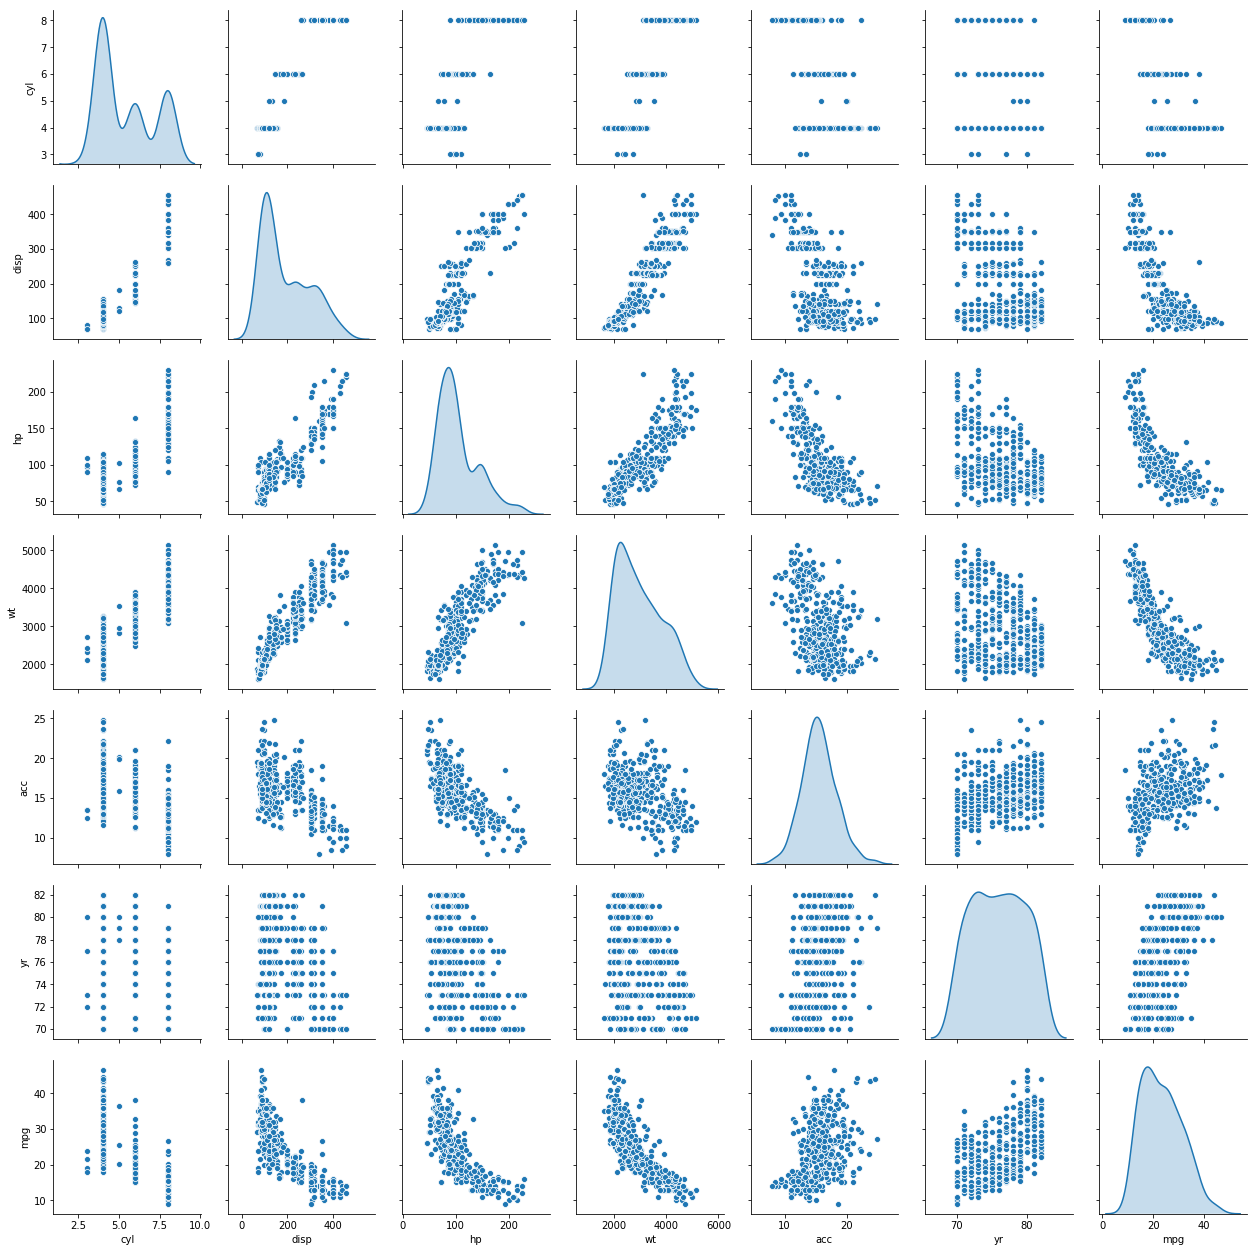

In [159]:
sns.pairplot(cars, diag_kind = 'kde')
# This shows the Gaussian for each feature. For the Cyl there are three Gaussians, and for Disp it shows three as well and so on...

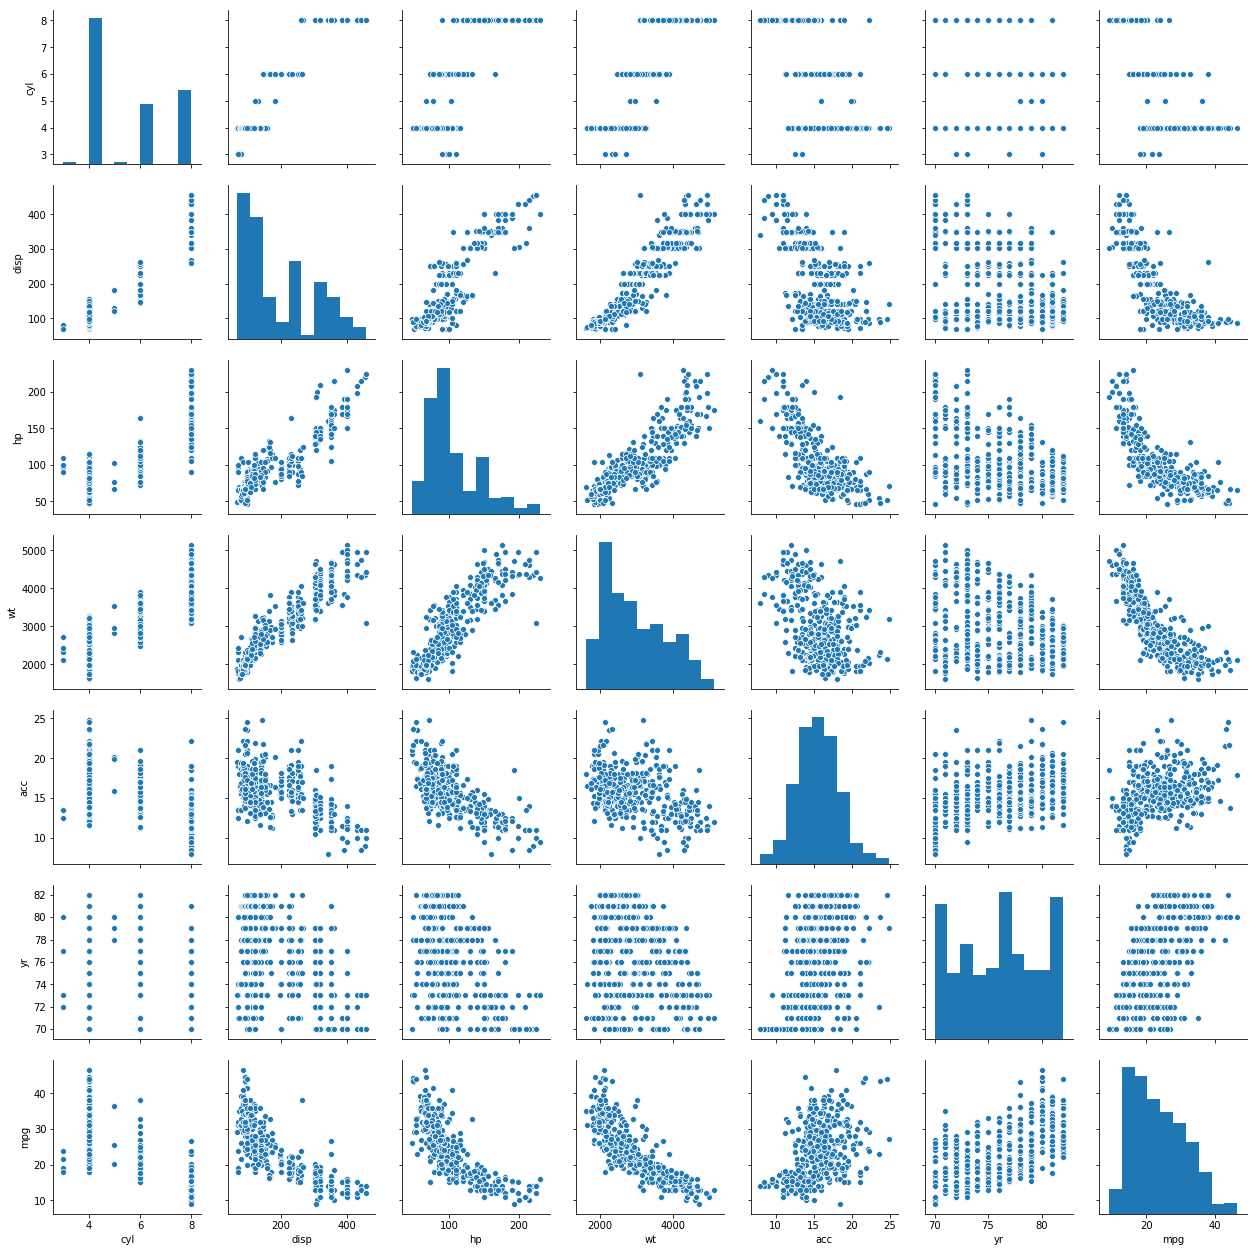

In [15]:
sns.pairplot(cars)

### 3.	Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters 

In [174]:
from sklearn import cluster

# Storing Numeric values 

X = cars[features]
X.columns



Index(['cyl', 'disp', 'wt', 'acc', 'yr', 'mpg', 'hp'], dtype='object')

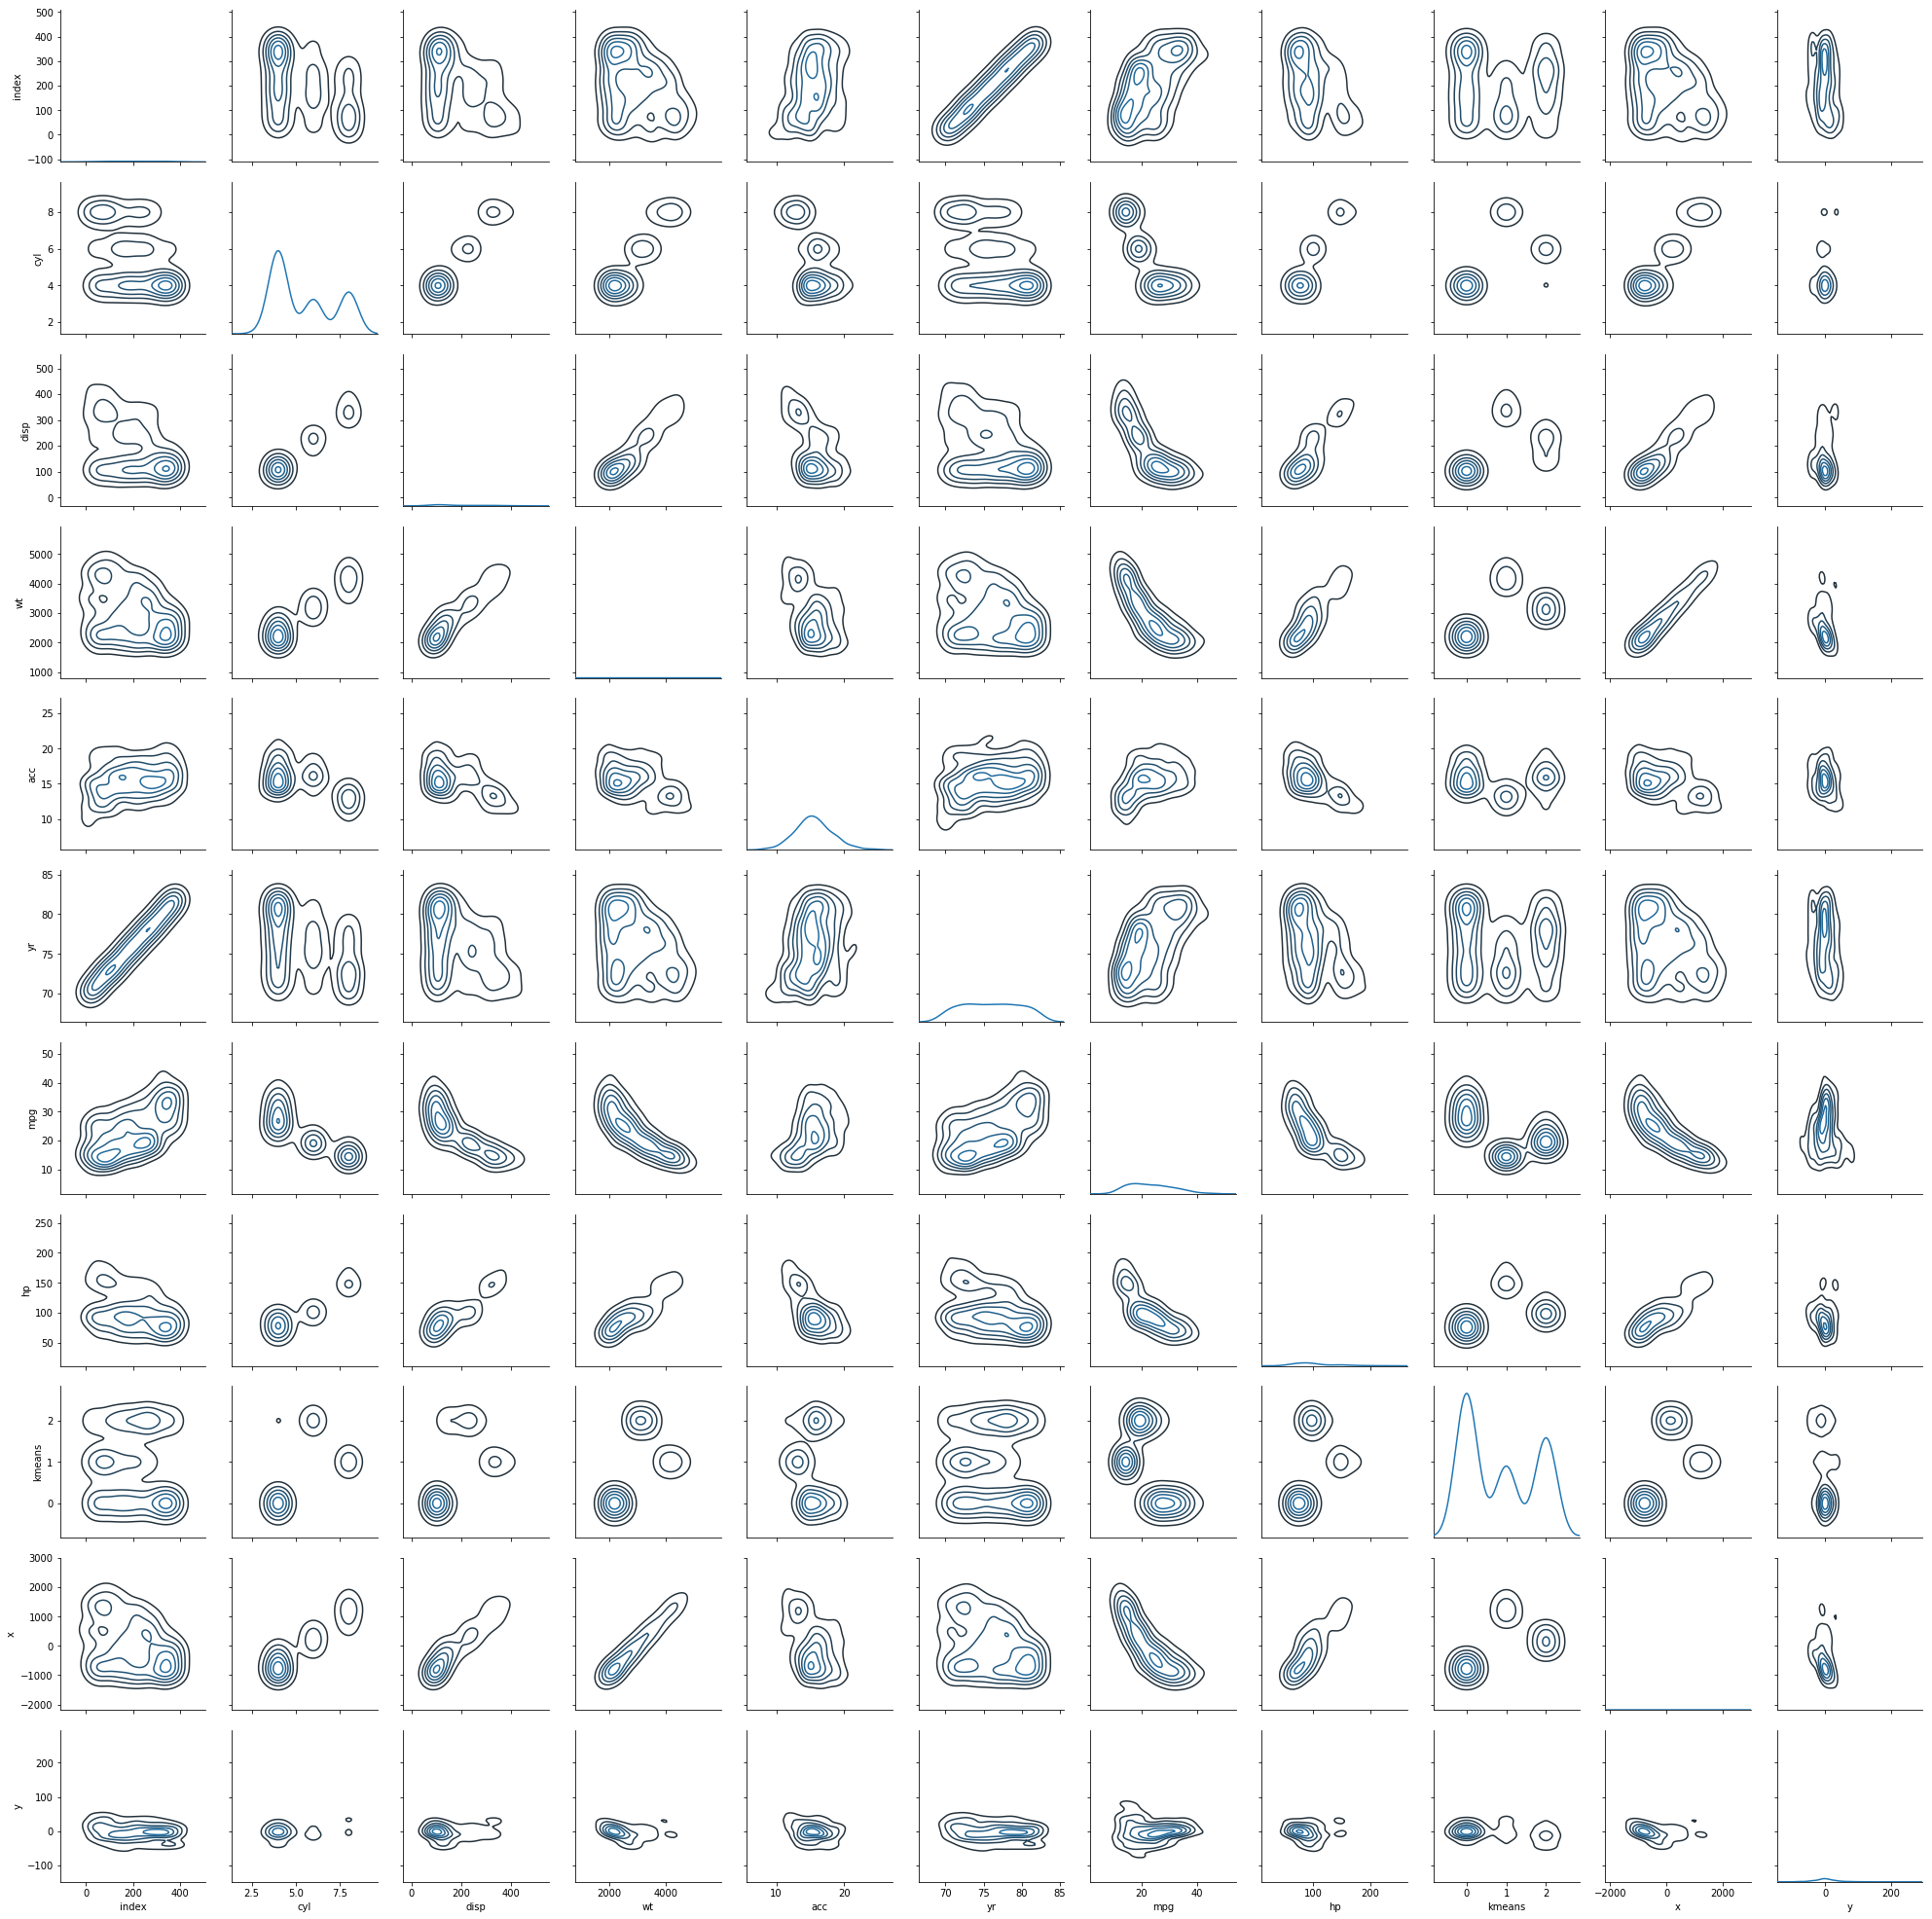

In [123]:
# Pairgrid Plot
g = sns.PairGrid(X)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

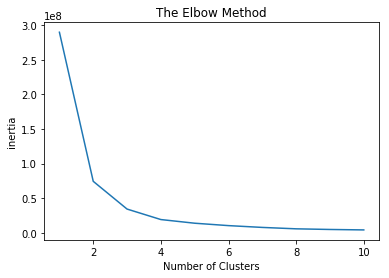

In [178]:
#Using Elbow method to find number of clusters
# Method-1 for Elbow Diagram
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

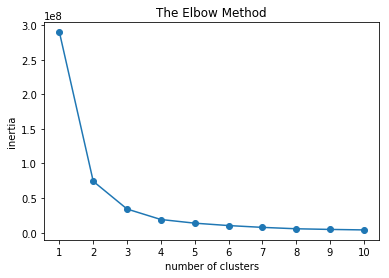

In [177]:
# Method-2 for Elbow Diagram

ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters= k)
    
    # Fit model to samples
    kmeans.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [176]:
#calculating Centroids
centroid = kmeans.cluster_centers_
print(centroid.shape)
print(centroid)

(10, 7)
[[7.85714286e+00 3.19892857e+02 4.03317857e+03 1.41357143e+01
  7.50000000e+01 1.53571429e+01 1.41178571e+02]
 [3.96202532e+00 1.05537975e+02 2.23770886e+03 1.61367089e+01
  7.62405063e+01 2.89367089e+01 7.97341772e+01]
 [5.19047619e+00 1.73428571e+02 2.90988095e+03 1.59904762e+01
  7.69285714e+01 2.27833333e+01 9.91190476e+01]
 [8.00000000e+00 3.85187500e+02 4.79237500e+03 1.29687500e+01
  7.25625000e+01 1.23750000e+01 1.79625000e+02]
 [6.53571429e+00 2.50285714e+02 3.42892857e+03 1.58392857e+01
  7.60357143e+01 1.87107143e+01 1.13035714e+02]
 [4.23636364e+00 1.36418182e+02 2.60789091e+03 1.54854545e+01
  7.73272727e+01 2.61636364e+01 9.14909091e+01]
 [8.00000000e+00 3.62032258e+02 4.35593548e+03 1.26935484e+01
  7.32903226e+01 1.41580645e+01 1.72000000e+02]
 [4.00000000e+00 8.81833333e+01 1.93450000e+03 1.72516667e+01
  7.71666667e+01 3.32433333e+01 6.55666667e+01]
 [7.24137931e+00 2.94413793e+02 3.70165517e+03 1.45000000e+01
  7.49655172e+01 1.68551724e+01 1.32103448e+02]
 [

#### Based on the Inertia Plot, we can see that 3 would be an optimal cluster size, as the decrease in intertia from 3 cluster decreases more slowly. 


In [184]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=3)

# This is to predict the clusters belongs to which observation. It will return as single vector. All the cluster values to be stored in new column 
X["kmeans"] = kmeans.fit_predict(X[X.columns[:7]])

In [185]:
# Principle Component Separation for 2-Dimensional picture (PCA)
cols = X.columns[1:]
pca = PCA(n_components=2)
X['x'] = pca.fit_transform(X[cols])[:,0]
X['y'] = pca.fit_transform(X[cols])[:,1]
X = X.reset_index()
# X.tail()

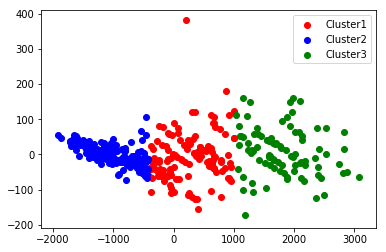

In [193]:
# Visualizing the Cluster
trace0 = plt.scatter(x = X[X.kmeans ==0]["x"], y = X[X.kmeans ==0]["y"],  label="Cluster1", color = 'red')
trace1 = plt.scatter(x = X[X.kmeans ==1]["x"], y = X[X.kmeans ==1]["y"],   label="Cluster2", color = 'blue')
trace2 = plt.scatter(x = X[X.kmeans ==2]["x"], y = X[X.kmeans ==2]["y"],   label="Cluster3", color = 'green')
# centroid = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  marker = "o", s=200, label="Centroid", color = 'yellow')



data = [trace0,trace1,trace2,centroid]
plt.legend()
plt.show(data)

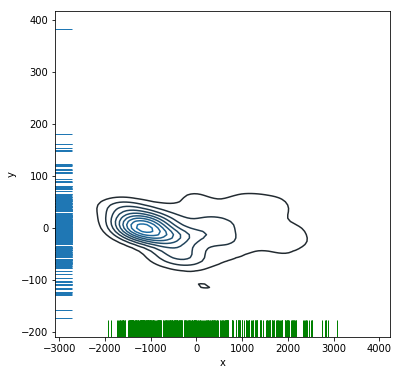

In [189]:
# Two-dimensional kernel density plot 
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(X.x, X.y, ax=ax)
sns.rugplot(X.x, color="g", ax=ax)
sns.rugplot(X.y, vertical=True, ax=ax);

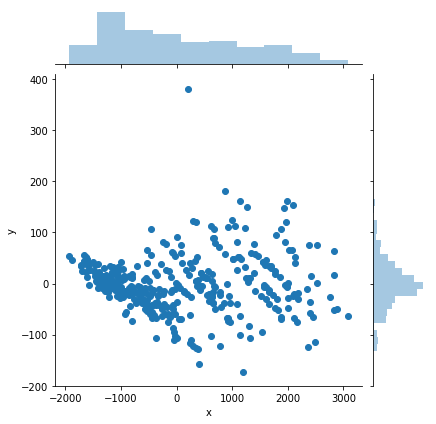

In [194]:
# Scatter Plot
sns.jointplot(x="x", y="y", data=X);

## Perform normalization


In [196]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [197]:
Scaler = StandardScaler()

# we are using 3 here because that was what we determined to be the optimal number using inertias.
kmeans = KMeans(n_clusters=3) 

# Create pipeline: pipeline
pipeline = make_pipeline(Scaler,kmeans)

# Convert from ints to floats
X1 = X.astype(np.float64)

pipeline.fit(X1)
labels = pipeline.predict(X1)
X1.head()

,level_0,index,cyl,disp,wt,acc,yr,mpg,hp,x,y,kmeans
0,0.0,0.0,8.0,307.0,3504.0,12.0,70.0,18.0,130.0,768.884233,72.136205,0.0
1,1.0,1.0,8.0,350.0,3693.0,11.5,70.0,15.0,165.0,1043.104199,112.268946,2.0
2,2.0,2.0,8.0,318.0,3436.0,11.0,70.0,18.0,150.0,676.294289,106.950325,0.0
3,3.0,3.0,8.0,304.0,3433.0,12.0,70.0,16.0,150.0,669.840249,88.742480,0.0
4,4.0,4.0,8.0,302.0,3449.0,10.5,70.0,17.0,140.0,691.424599,79.160811,0.0


## Standardize numerical data

In [199]:
#calculating Centroids
centroid = kmeans.cluster_centers_
print(centroid.shape)
print(centroid)

(3, 12)
[[-0.52696553 -0.52696553 -0.30867304 -0.30976129 -0.26322198  0.3236497
  -0.53743444 -0.16507779 -0.33577998 -0.2642744  -0.19152091 -0.46494271]
 [-0.65544946 -0.65544946  1.49819126  1.48754268  1.39201013 -1.02430064
  -0.63270904 -1.14094647  1.47845989  1.39511615  0.55642631  1.07278301]
 [ 1.03869437  1.03869437 -0.69050988 -0.68194999 -0.66780226  0.34679444
   1.03464878  0.97109186 -0.64673122 -0.66877484 -0.1709118  -0.22304075]]


### 4.	Use linear regression model on different clusters separately and print the coefficients of the models individually 

In [200]:
# Storing the each cluster data in the dataset
X["cluster1"] = X.kmeans==0
X["cluster2"] = X.kmeans==1
X["cluster3"] = X.kmeans==2
X.head()

,level_0,index,cyl,disp,wt,acc,yr,mpg,hp,x,y,kmeans,cluster1,cluster2,cluster3
0,0,0,8,307.0,3504,12.0,70,18.0,130,768.884233,72.136205,0,True,False,False
1,1,1,8,350.0,3693,11.5,70,15.0,165,1043.104199,112.268946,2,False,False,True
2,2,2,8,318.0,3436,11.0,70,18.0,150,676.294289,106.950325,0,True,False,False
3,3,3,8,304.0,3433,12.0,70,16.0,150,669.840249,88.742480,0,True,False,False
4,4,4,8,302.0,3449,10.5,70,17.0,140,691.424599,79.160811,0,True,False,False


In [201]:
# Creating dataset with each cluster.

XC1 = X.drop(["kmeans", "x","y","cluster2","cluster3","index"], axis=1)
XC2 = X.drop(["kmeans", "x","y","cluster1","cluster3","index"], axis=1)
XC3 = X.drop(["kmeans", "x","y","cluster1","cluster2","index"], axis=1)

In [202]:
# Check the columnes of each dataset with clusters
XC1.columns

Index(['level_0', 'cyl', 'disp', 'wt', 'acc', 'yr', 'mpg', 'hp', 'cluster1'], dtype='object')

In [203]:
XC2.columns

Index(['level_0', 'cyl', 'disp', 'wt', 'acc', 'yr', 'mpg', 'hp', 'cluster2'], dtype='object')

In [204]:
XC3.columns

Index(['level_0', 'cyl', 'disp', 'wt', 'acc', 'yr', 'mpg', 'hp', 'cluster3'], dtype='object')

In [205]:
# This is to store the data points that belongs to cluster1 - True
Cluster1True =  XC1[XC1.cluster1==True]

# Drop the Cluster1 column 
Cluster1True = Cluster1True.drop(["cluster1"], axis=1)

Cluster1True.head()

,level_0,cyl,disp,wt,acc,yr,mpg,hp
0,0,8,307.0,3504,12.0,70,18.0,130
2,2,8,318.0,3436,11.0,70,18.0,150
3,3,8,304.0,3433,12.0,70,16.0,150
4,4,8,302.0,3449,10.5,70,17.0,140
10,10,8,383.0,3563,10.0,70,15.0,170


In [206]:
Cluster1True.shape

(126, 8)

In [207]:
# This is to store the data points that belongs to cluster2 - True
Cluster2True =  XC2[XC2.cluster2==True]

# Drop the Cluster3 column 
Cluster2True = Cluster2True.drop(["cluster2"], axis=1)
Cluster2True.head()


,level_0,cyl,disp,wt,acc,yr,mpg,hp
14,14,4,113.0,2372,15.0,70,24.0,95
17,17,6,200.0,2587,16.0,70,21.0,85
18,18,4,97.0,2130,14.5,70,27.0,88
19,19,4,97.0,1835,20.5,70,26.0,46
20,20,4,110.0,2672,17.5,70,25.0,87


In [208]:
Cluster2True.shape

(182, 8)

In [209]:
# This is to store the data points that belongs to cluster2 - True
Cluster3True =  XC3[XC3.cluster3==True]

# Drop the Cluster3 column 
Cluster3True = Cluster3True.drop(["cluster3"], axis=1)
Cluster3True.head()

,level_0,cyl,disp,wt,acc,yr,mpg,hp
1,1,8,350.0,3693,11.5,70,15.0,165
5,5,8,429.0,4341,10.0,70,15.0,198
6,6,8,454.0,4354,9.0,70,14.0,220
7,7,8,440.0,4312,8.5,70,14.0,215
8,8,8,455.0,4425,10.0,70,14.0,225


In [210]:
Cluster3True.shape

(90, 8)

In [211]:
#Cluster1True + Cluster2True + Cluster3True = 398 rows. Hense the distribution of datapoints is accurate

In [212]:
# Splitting the data for each cluster1 into dependent and independent variables


XCluster1True = Cluster1True.drop(["mpg"], axis=1)
y1 = Cluster1True["mpg"]


In [213]:
# Splitting the data for each cluster2 into dependent and independent variables

XCluster2True = Cluster2True.drop(["mpg"], axis=1)
y2 = Cluster2True["mpg"]

In [214]:
# Splitting the data for each cluster3 into dependent and independent variables

XCluster3True = Cluster3True.drop(["mpg"], axis=1)
y3 = Cluster3True["mpg"]

## Linear Regression for Cluster1

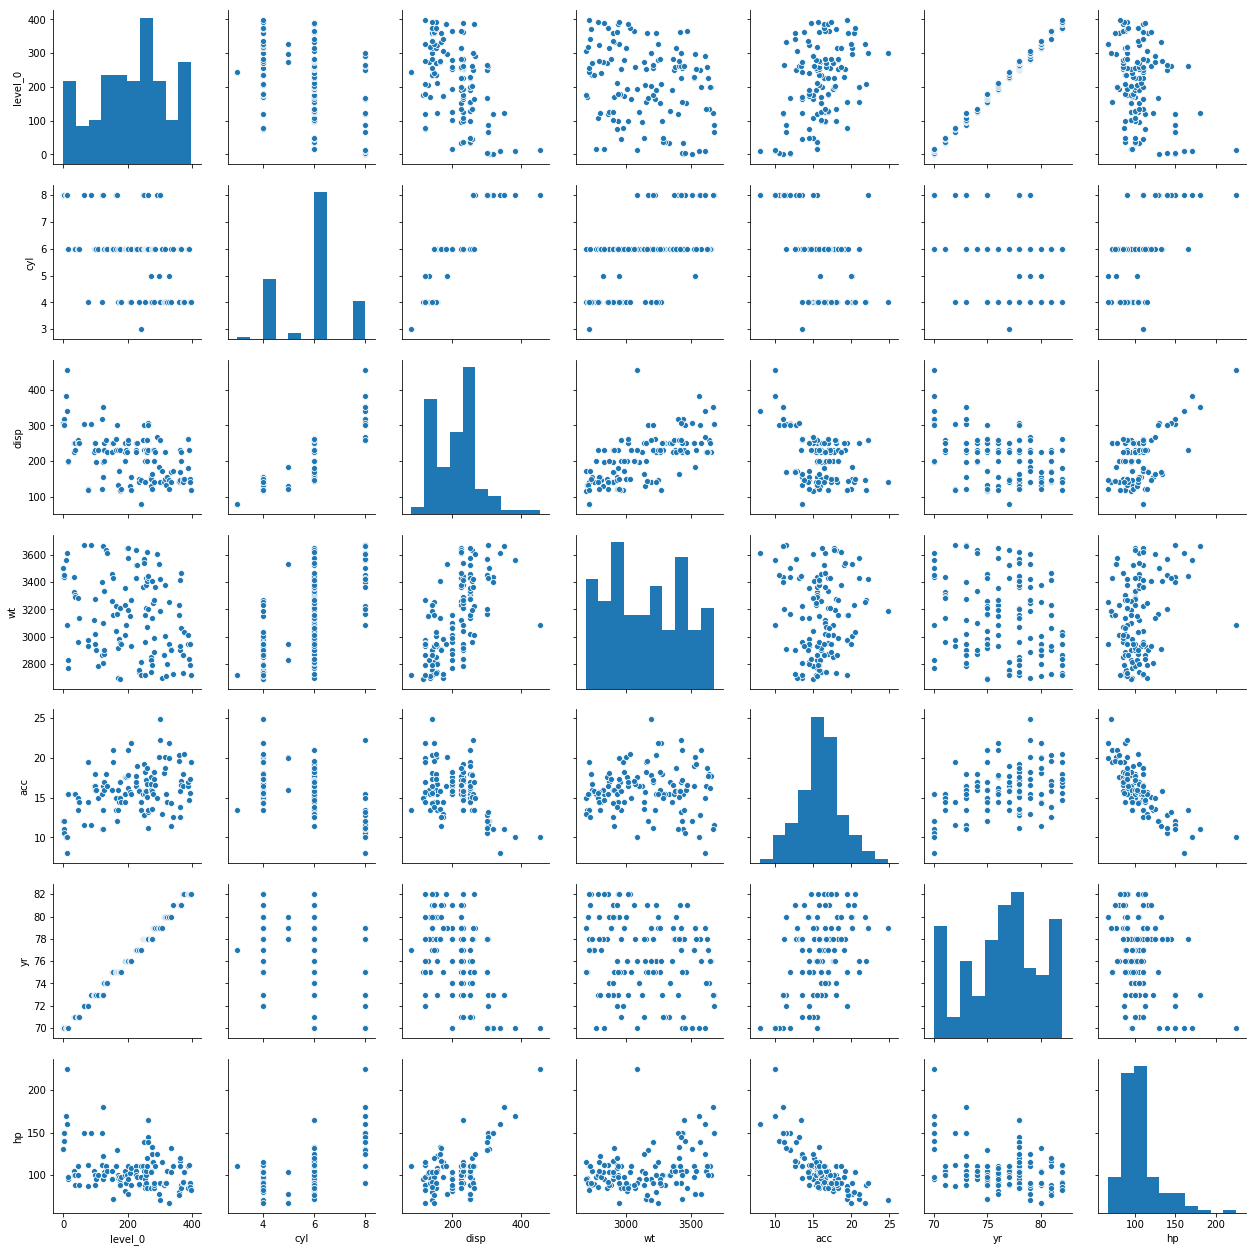

In [215]:
sns.pairplot(XCluster1True)

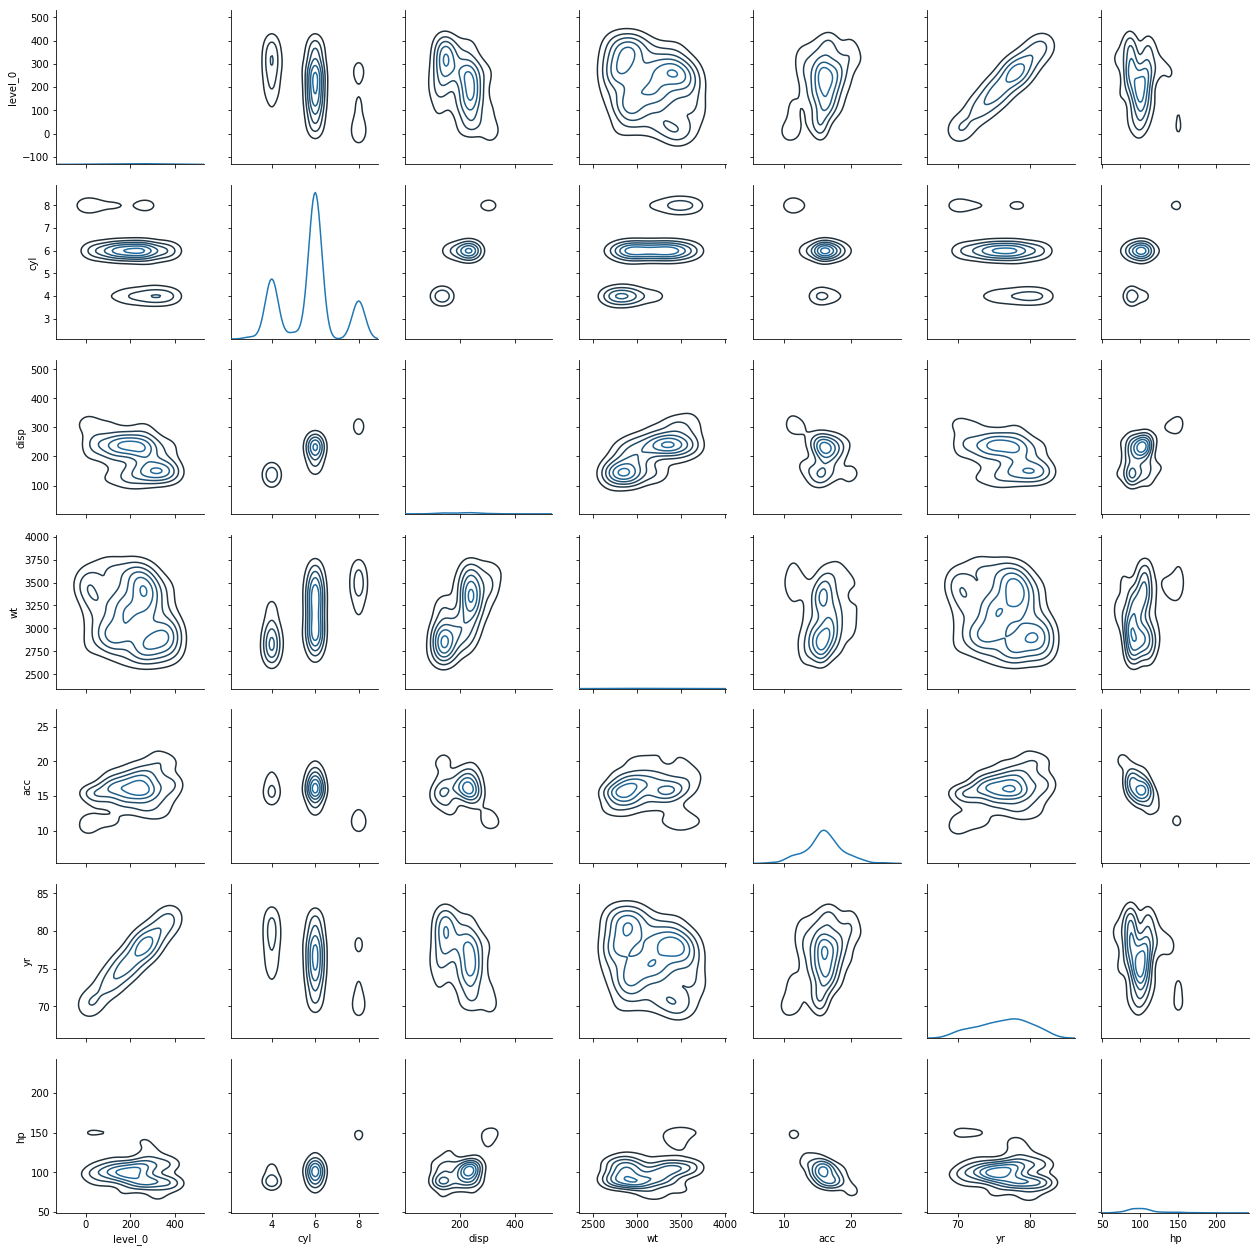

In [216]:
g = sns.PairGrid(XCluster1True)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [217]:
# Splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(Cluster1True,y1,test_size=0.3)

In [218]:
from sklearn.linear_model import LinearRegression


In [219]:
# Fitting Multiple Linear Regression Model to Training set
regressor1 = LinearRegression()
regressor1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
# Predicting the Test set results 
y1_predicted = regressor1.predict(X1_test)
y1_predicted

array([32.7, 27. , 19. , 14. , 20. , 27.2, 16. , 20.2, 19. , 17. , 16.2,
       30. , 17. , 31. , 18. , 20.6, 21.5, 20.2, 23.6, 15. , 25.4, 20.6,
       23. , 26.4, 20.5, 18. , 13. , 20.8, 19. , 16. , 22.4, 21.6, 29.8,
       22. , 22. , 22.5, 24.5, 18. ])

In [221]:
# Root Mean Square
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_predicted))
rmse

1.5220906417323106e-14

In [222]:
# Find the coefficient 
coef1 = regressor1.coef_
coef1

array([ 4.53922543e-17,  1.41553436e-15,  3.12250226e-16, -2.77555756e-17,
       -4.79271570e-16, -1.01242799e-15,  1.00000000e+00, -6.93455710e-16])

In [223]:
# Find the intercept 
intr1 = regressor1.intercept_ 
intr1

1.4210854715202004e-13

In [224]:
# Score for Train
regressor1.score(X1_train, y1_train)

1.0

In [225]:
# Score for Test
regressor1.score(X1_test, y1_test)

1.0

In [226]:
# Building the formula for Multiple Linear Regression (y = mx + c)
y1plot = coef1 * X1_train + intr1
y1plot.head()

,level_0,cyl,disp,wt,acc,yr,mpg,hp
35,1.436973e-13,1.506018e-13,2.201711e-13,4.971024e-14,1.346798e-13,7.022616e-14,17.0,7.276298e-14
323,1.567702e-13,1.477707e-13,1.908196e-13,6.439294e-14,1.352070e-13,6.111431e-14,27.9,6.929570e-14
99,1.466024e-13,1.506018e-13,2.145506e-13,6.036838e-14,1.344402e-13,6.820130e-14,18.0,7.276298e-14
47,1.442420e-13,1.506018e-13,2.201711e-13,5.101475e-14,1.349195e-13,7.022616e-14,19.0,7.276298e-14
236,1.528211e-13,1.477707e-13,1.858236e-13,6.564194e-14,1.345361e-13,6.415159e-14,25.5,8.039099e-14


In [227]:

# plt.plot(y1plot,X1_train,)
# plt.scatter(y1plot,X1_train)

## Linear Regression for Cluster2

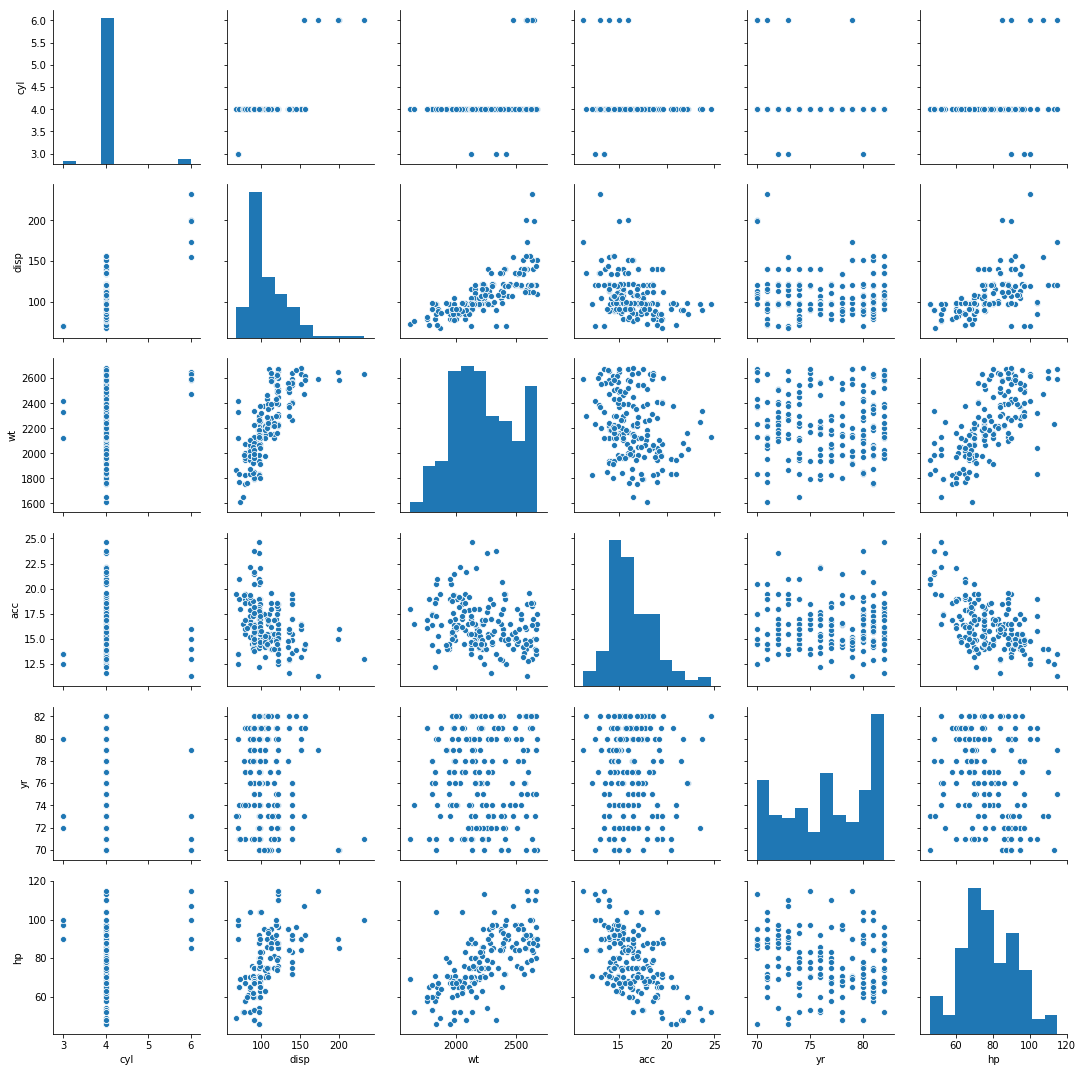

In [56]:
sns.pairplot(XCluster2True)

In [228]:
# Splitting dataset into training and test set
X2_train,X2_test,y2_train,y2_test = train_test_split(Cluster2True,y2,test_size=0.25)

In [229]:
regressor2 = LinearRegression()

regressor2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [230]:
y2_predicted = regressor2.predict(X2_test)
y2_predicted

array([23. , 27.5, 29. , 28. , 28.8, 35. , 19. , 26. , 31. , 21. , 26. ,
       24. , 37.7, 27. , 29.9, 29. , 28. , 37.2, 28.4, 31. , 32. , 28. ,
       37. , 27. , 24. , 33.5, 28. , 18. , 24. , 22. , 33.5, 37. , 26. ,
       24.5, 21. , 38. , 25. , 31. , 20. , 44.6, 31.3, 21.5, 24. , 26. ,
       31.5, 28. ])

In [231]:
# Root Mean Square
rmse = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_predicted))
rmse

2.218668981299174e-14

In [232]:
# Find the coefficient 
coef2 = regressor2.coef_
coef2

array([-6.94116534e-17, -2.35644837e-14, -6.80011603e-16,  5.55111512e-17,
       -3.36102673e-16,  8.04911693e-16,  1.00000000e+00, -2.98372438e-16])

In [233]:
# Find the intercept 
intr2 = regressor2.intercept_ 
intr2

2.4868995751603507e-14

In [234]:
# Score for Train
regressor2.score(X2_train, y2_train)

1.0

In [235]:
# Score for Test
regressor2.score(X2_test, y2_test)

1.0

In [236]:
# Building the formula for Multiple Linear Regression (y = mx + c)
y2plot = coef2 * X2_train + intr2
y2plot.head()

,level_0,cyl,disp,wt,acc,yr,mpg,hp
322,2.518443e-15,-6.938894e-14,-3.361200e-14,1.419975e-13,1.885276e-14,8.926193e-14,46.6,5.474787e-15
380,-1.507433e-15,-6.938894e-14,-5.673240e-14,1.447731e-13,1.999551e-14,9.087175e-14,36.0,-1.387779e-15
51,2.132900e-14,-6.938894e-14,-2.885192e-14,1.399991e-13,1.831499e-14,8.201773e-14,30.0,3.982925e-15
19,2.355017e-14,-6.938894e-14,-4.109213e-14,1.267320e-13,1.797889e-14,8.121281e-14,26.0,1.114386e-14
130,1.584548e-14,-6.938894e-14,-5.809242e-14,1.609268e-13,1.932330e-14,8.443246e-14,26.0,9.992007e-16


## Linear Regression for Cluster3

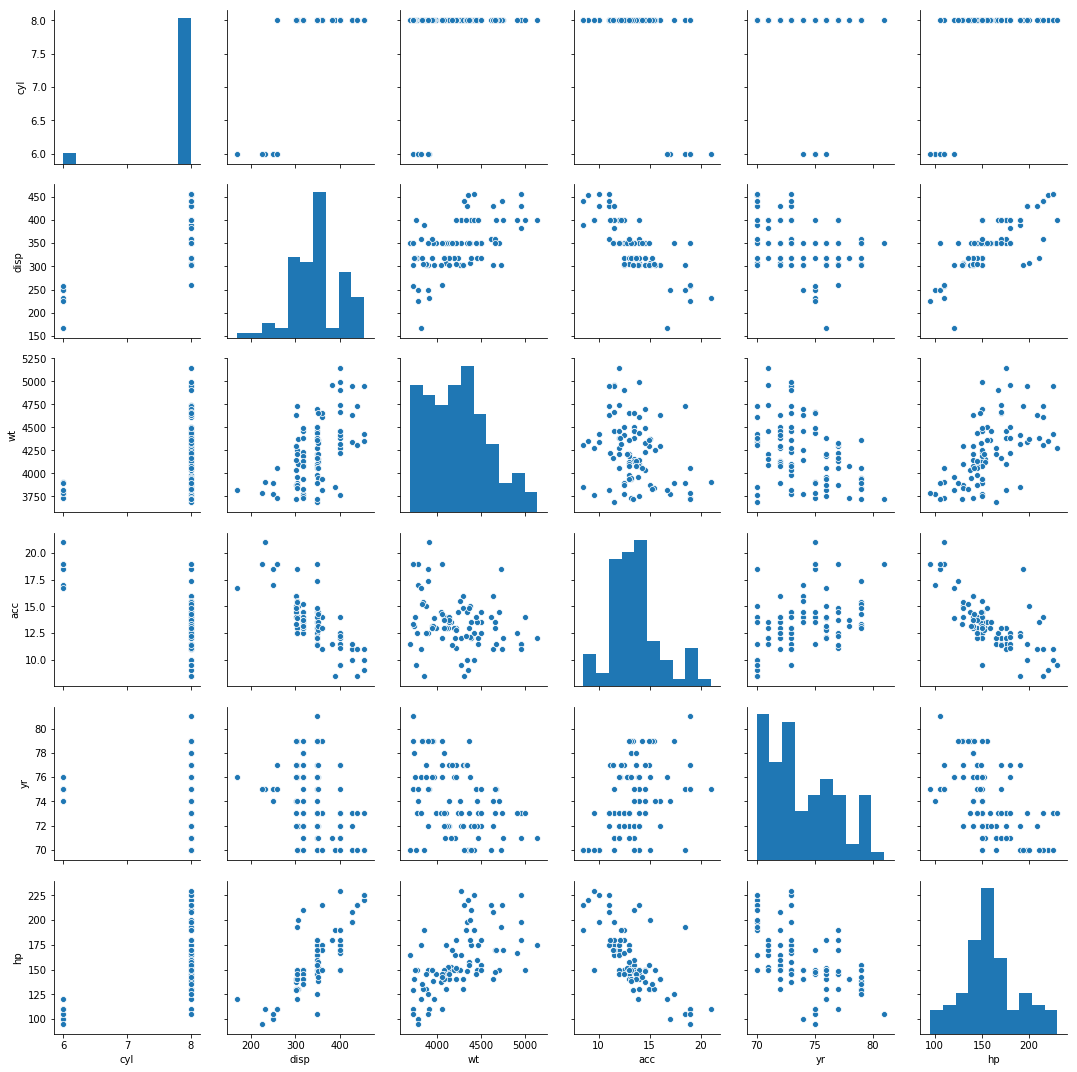

In [67]:
sns.pairplot(XCluster3True)

In [237]:
# Splitting dataset into training and test set

X3_train,X3_test,y3_train,y3_test = train_test_split(Cluster3True,y3,test_size=0.3)

In [238]:
regressor3 = LinearRegression()

regressor3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [239]:
y3_predicted = regressor3.predict(X3_test)
y3_predicted

array([12. , 14. , 11. , 14. , 13. , 17.5, 14. , 17.5, 15.5, 16. , 13. ,
       14. , 18.5, 14.5, 15. , 14. , 15. , 13. , 13. , 16. , 19.4, 10. ,
       15.5, 17. , 16. , 15. , 14. ])

In [240]:
# Root Mean Square
rmse = sqrt(mean_squared_error(y_true=y3_test,y_pred=y3_predicted))
rmse

3.0477354008549684e-14

In [241]:
# Find the coefficient 
coef3 = regressor3.coef_
coef3

array([ 2.37013733e-16, -2.07299455e-15, -7.98406480e-16, -3.12250226e-17,
       -2.76254714e-16, -1.27491333e-15,  1.00000000e+00,  2.12980675e-15])

In [242]:
# Find the intercept 
intr3 = regressor3.intercept_ 
intr3

1.616484723854228e-13

In [243]:
# Score for Train
regressor3.score(X3_train, y3_train)

1.0

In [244]:
# Score for Test
regressor3.score(X3_test, y3_test)

1.0

In [245]:
# Building the formula for Multiple Linear Regression (y = mx + c)
y3plot = coef3 * X3_train + intr3
y3plot.head()

,level_0,cyl,disp,wt,acc,yr,mpg,hp
74,1.791875e-13,1.450645e-13,-7.947028e-14,2.756823e-14,1.572284e-13,6.985471e-14,13.0,4.598214e-13
229,2.159246e-13,1.450645e-13,-1.577141e-13,2.987888e-14,1.585820e-13,6.348015e-14,16.0,5.450137e-13
138,1.943564e-13,1.450645e-13,-9.224479e-14,2.247855e-14,1.579190e-13,6.730489e-14,14.0,4.811195e-13
7,1.633076e-13,1.450645e-13,-1.896504e-13,2.700618e-14,1.593003e-13,7.240454e-14,14.0,6.195569e-13
133,1.931713e-13,1.492105e-13,-3.795315e-14,4.358666e-14,1.569521e-13,6.730489e-14,16.0,3.746291e-13
